In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_text,job_state,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.job_state = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA' )

In [9]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [10]:
df['n_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [11]:
df.min_salary = df.apply(lambda x: x.min_salary * 2 if x.hourly == 1 else x.min_salary, axis=1)
df.max_salary = df.apply(lambda x: x.max_salary * 2 if x.hourly == 1 else x.max_salary, axis=1)

In [12]:
df.company_text = df.company_text.apply(lambda x: x.replace('\n', ''))

In [13]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,desc_len,n_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simplified',
       'seniority', 'desc_len', 'n_competitors'],
      dtype='object')

<AxesSubplot:>

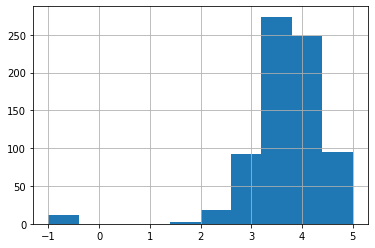

In [15]:
df.Rating.hist()

<AxesSubplot:>

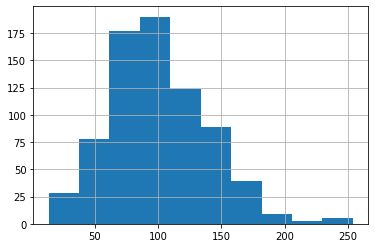

In [16]:
df.avg_salary.hist()

<AxesSubplot:>

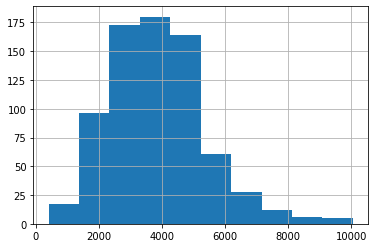

In [17]:
df.desc_len.hist()

<AxesSubplot:>

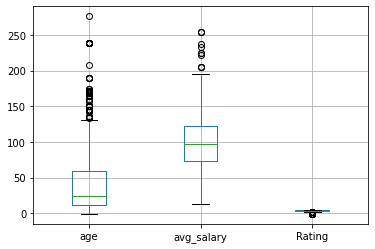

In [18]:
df.boxplot(column=['age', 'avg_salary', 'Rating'])

<AxesSubplot:>

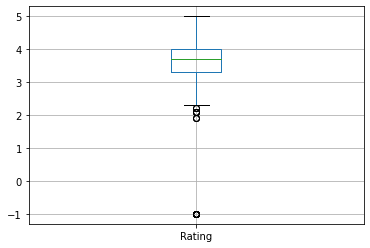

In [19]:
df.boxplot(column= 'Rating')

<AxesSubplot:>

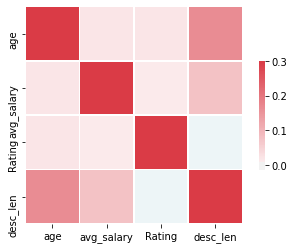

In [20]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correl = df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()
sns.heatmap(correl, center=0, square=True, cmap=cmap, vmax=0.3, linewidths=.5, cbar_kws={'shrink': .5})

In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simplified',
       'seniority', 'desc_len', 'n_competitors'],
      dtype='object')

In [23]:
df_cat = df[['Location', 'Headquarters', 'Size', 
'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'job_state', 'same_state', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simplified']]

Graph for Location: Total = 200


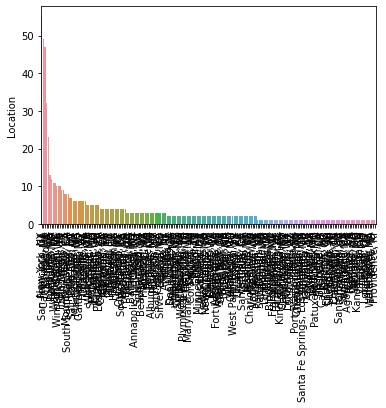

Graph for Headquarters: Total = 198


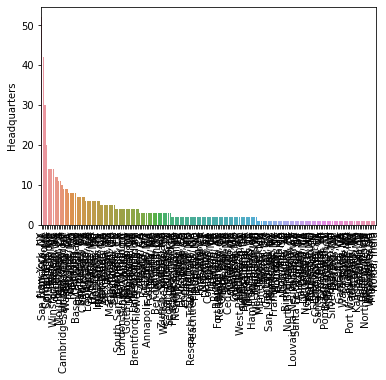

Graph for Size: Total = 9


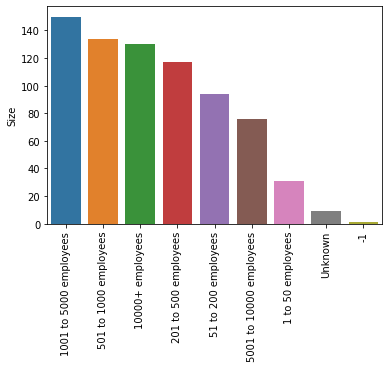

Graph for Type of ownership: Total = 11


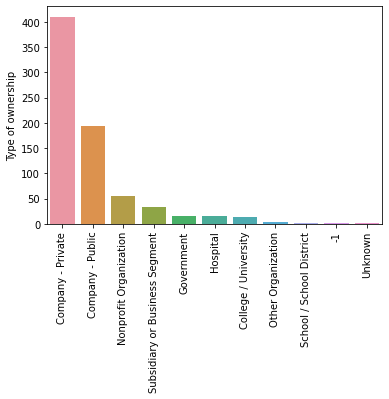

Graph for Industry: Total = 60


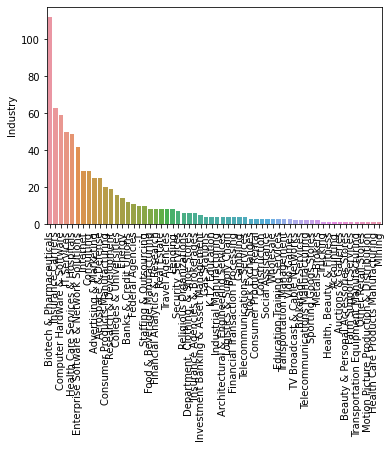

Graph for Sector: Total = 25


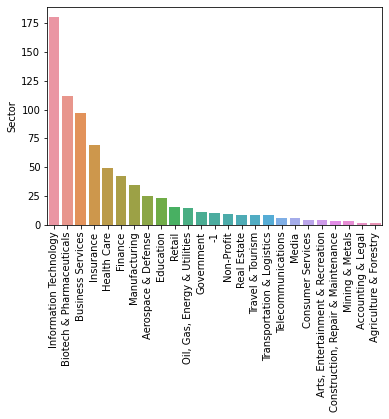

Graph for Revenue: Total = 14


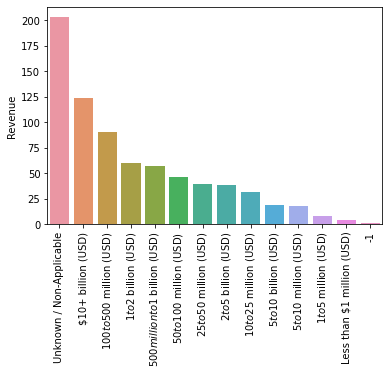

Graph for company_text: Total = 343


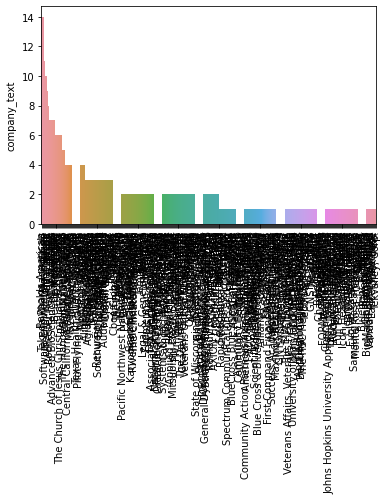

Graph for job_state: Total = 37


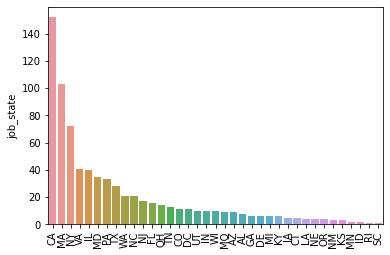

Graph for same_state: Total = 2


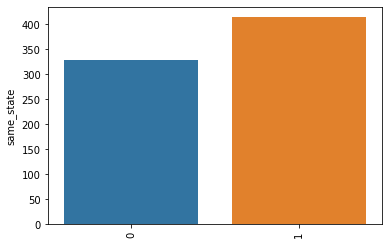

Graph for spark_yn: Total = 2


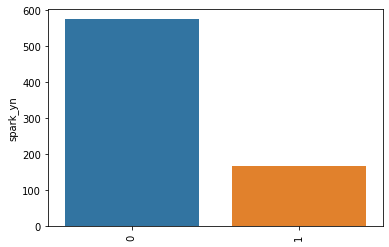

Graph for aws_yn: Total = 2


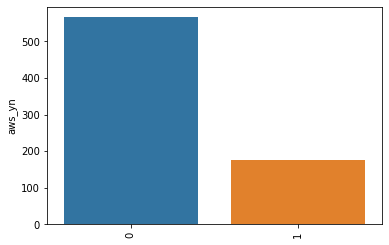

Graph for excel_yn: Total = 2


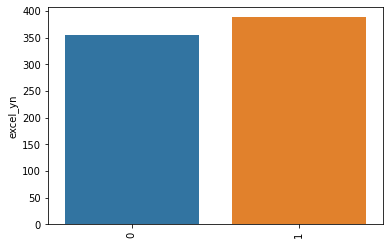

Graph for job_simplified: Total = 7


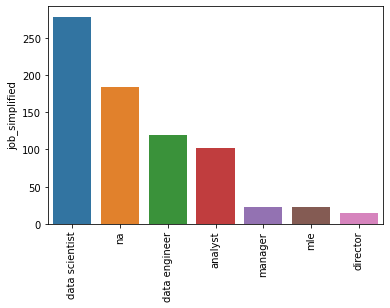

In [29]:
for col in df_cat.columns:
    cat_num = df_cat[col].value_counts()
    print(f'Graph for {col}: Total = {len(cat_num)}')
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [31]:
pd.pivot_table(df, index='job_simplified', values='avg_salary')

,avg_salary
job_simplified,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [32]:
pd.pivot_table(df, index=['job_simplified', 'seniority'], values='avg_salary')

avg_salary
job_simplified seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [43]:
pd.pivot_table(df, index=['job_state', 'job_simplified'], values='avg_salary').sort_values('avg_salary', ascending=False)

avg_salary
job_state job_simplified            
IL        director        221.750000
CA        mle             177.300000
NJ        director        161.500000
DC        data scientist  149.000000
CA        data scientist  142.522059
...                              ...
CO        na               31.500000
          analyst          29.500000
DE        na               27.500000
LA        na               20.000000
TN        analyst          13.500000

[114 rows x 1 columns]

In [48]:
pd.pivot_table(df[df.job_simplified == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [49]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simplified',
       'seniority', 'desc_len', 'n_competitors'],
      dtype='object')

In [55]:
df_pivots = df[['Industry', 'Sector', 'Revenue', 'n_competitors', 'hourly', 'employer_provided', 'python_yn', 'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership', 'avg_salary']]

In [59]:
for col in df_pivots.columns[:-1]:
    print(col)
    print(pd.pivot_table(df_pivots, index=col, values='avg_salary').sort_values('avg_salary', ascending=False))

Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Brokerage Services                        129.000000
Auctions & Galleries                      128.000000
Internet                                  123.810345
Investment Banking & Asset Management     118.400000
TV Broadcast & Cable Networks             117.750000
Enterprise Software & Network Solutions   115.369048
Computer Hardware & Software              115.194915
-1                                        114.650000
Accounting                                113.500000
Biotech & Pharmaceuticals                 111.767857
Insurance Agencies & Brokerages           109.250000
K-12 Education                       

In [62]:
pd.pivot_table(df_pivots, index=['Revenue'], columns=['python_yn'], values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [64]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

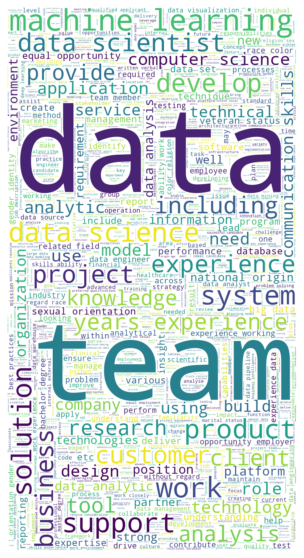

In [66]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)

    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(X=wc, interpolation='bilinear')
plt.axis('off')
plt.show()